# Getting Started

### Import modules

In [1]:
from pyosrd.osrd import OSRD
from pyosrd.schedules import Schedule, schedule_from_osrd

# Import two CpAgents :
from rlway_cpagent.ortools_agent.ortools_agent import OrtoolsAgent

### Load a use case and add delays

In [2]:
# Load an OSRD use case
ref = OSRD(use_case='station_capacity2', dir='tmp')
# Clear the tmp delays
ref.reset_delays()
# Add a new delay to the use case
ref.add_delay('train0', time_threshold=100, delay=285.)
delayed = ref.delayed()

[14:32:18,957] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[14:32:18,989] [INFO]              [FullInfra] parsing infra
[14:32:19,062] [INFO]              [FullInfra] adaptation to kotlin
[14:32:19,089] [INFO]              [FullInfra] loading signals
[14:32:19,094] [INFO]              [FullInfra] building blocks
[14:32:19,100] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/simulation.json
[14:32:19,111] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.0
[14:32:19,156] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.1
[14:32:19,162] [INFO]  [StandaloneSimulationCommand] All simulations completed
[14:32:19,162] [INFO]  [StandaloneSimulationCommand] Saving results at: tmp/results.json


### Visualize use case

In [3]:
# Convert the simulation in a format more suitable for visualization
delayed_schedule = schedule_from_osrd(delayed)

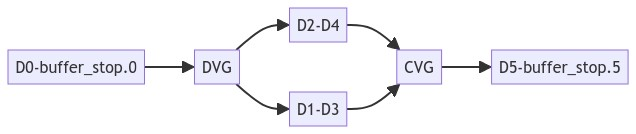

In [4]:
# Draw the infrastructure
delayed_schedule.draw_graph()

<Axes: xlabel='Time'>

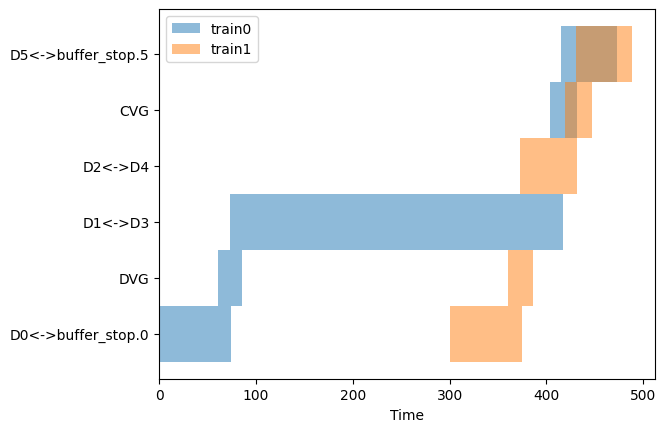

In [5]:
# Plot the space/time graph
delayed_schedule.plot()

### Compute an optimal regulation using OrtoolsAgent

In [6]:
ortools_regulated = ref.regulate(agent=OrtoolsAgent("ortools_agent"))
ortools_regulated_schedule = schedule_from_osrd(ortools_regulated)

solving start
solving end :  10.455608367919922 ms
solving start
solving end :  7.443428039550781 ms
solving start
solving end :  8.74781608581543 ms
[14:32:20,185] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[14:32:20,211] [INFO]              [FullInfra] parsing infra
[14:32:20,276] [INFO]              [FullInfra] adaptation to kotlin
[14:32:20,303] [INFO]              [FullInfra] loading signals
[14:32:20,308] [INFO]              [FullInfra] building blocks
[14:32:20,313] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/delayed/ortools_agent/simulation.json
[14:32:20,333] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.0
[14:32:20,394] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.1
[14:32:20,401] [INFO]  [StandaloneSimulationCommand] All simulations completed
[14:32:20,401] [INFO]  [StandaloneSimulationCommand] Saving results at: tmp/delayed/ortools_agent/results.json


<Axes: xlabel='Time'>

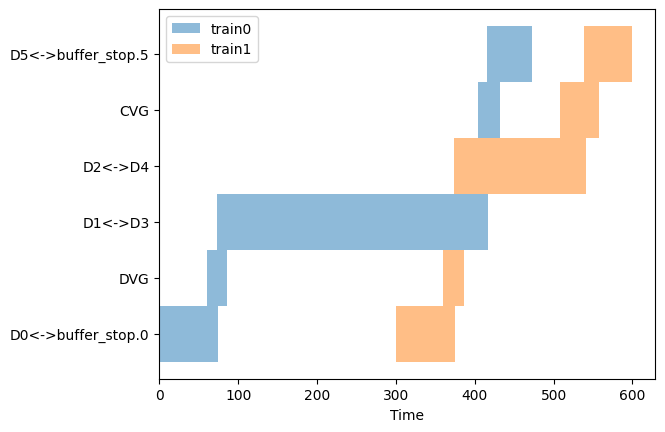

In [7]:
# Plot the space/time graph
ortools_regulated_schedule.plot()

### 